In [9]:
# loading packages

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3Dhttp://localhost:8888/notebooks/ML%20-%20Country%20Risk.ipynb#
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
pwd

'C:\\Users\\ofagb'

# Load Data

In [3]:
country_risk = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\Country Risk 2019 Data.csv")

In [5]:
country_risk

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400
117,Vietnam,VI,37,1.877,5.084,6.500
118,Yemen,YE,15,3.369,2.671,2.113
119,Zambia,ZM,34,1.805,4.592,2.021


In [6]:
country_risk.dtypes

Country        object
Abbrev         object
Corruption      int64
Peace         float64
Legal         float64
GDP Growth    float64
dtype: object

In [7]:
country_risk[country_risk.Corruption == country_risk.Corruption.max()]

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
28,Denmark,DK,87,1.316,8.174,1.698
76,New Zealand,NZ,87,1.221,8.514,2.506


# Checking Correlation

In [10]:
country_risk.describe() #checking descriptive stats on the df

,Corruption,Peace,Legal,GDP Growth
count,121.000000,121.000000,121.000000,121.000000
mean,46.842975,2.001017,5.752529,2.657529
std,18.702499,0.461485,1.373932,2.563741
min,15.000000,1.072000,2.671000,-9.459000
25%,33.000000,1.699000,4.785000,1.249000
50%,41.000000,1.939000,5.455000,2.600000
75%,60.000000,2.294000,6.488000,4.000000
max,87.000000,3.369000,8.712000,7.800000


In [11]:
country_risk.corr() #checking correlation matrix among features. 3 features Peace, Legal and GDP Growth. 
#Corruption and Legal are highly correlated, we drop the Courrption variable. 

,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,-0.705002,0.938512,-0.123545
Peace,-0.705002,1.000000,-0.662233,-0.004428
Legal,0.938512,-0.662233,1.000000,-0.150369
GDP Growth,-0.123545,-0.004428,-0.150369,1.000000


# Feature Scaling

In [13]:
X = country_risk[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
X

,Peace,Legal,GDP Growth
0,-0.390081,-0.878158,0.126952
1,0.472352,-0.958948,-0.040772
2,-0.026039,-0.484397,-2.230541
3,0.634871,-0.684553,1.303747
4,-1.261182,1.900001,-0.368418
...,...,...,...
116,-0.628442,0.419578,-0.880560
117,-0.268734,-0.486581,1.498775
118,2.964307,-2.242855,-0.212396
119,-0.424752,-0.844677,-0.248281


# Determining K (Using Elbow Method)

C:\Users\ofagb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


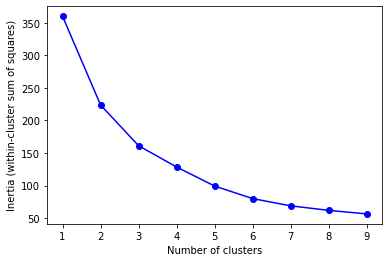

In [14]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

# K Means with k = 3

In [15]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


# Visualize the result (3D plots)

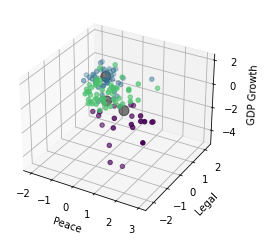

In [18]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

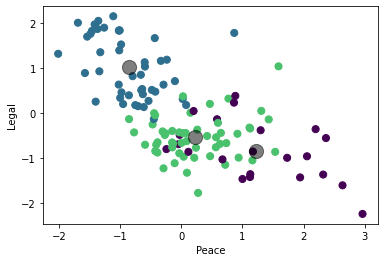

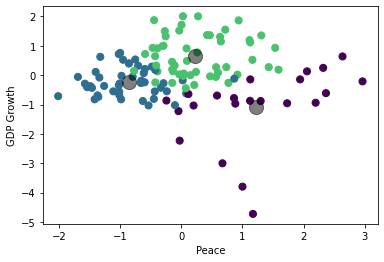

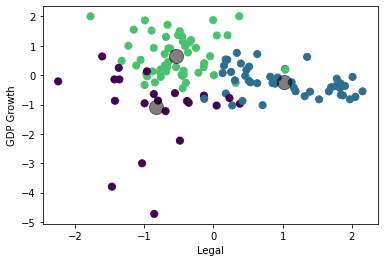

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show() #2D Visualisation

# 2D Visualisation with Countries abbs instead of Dots

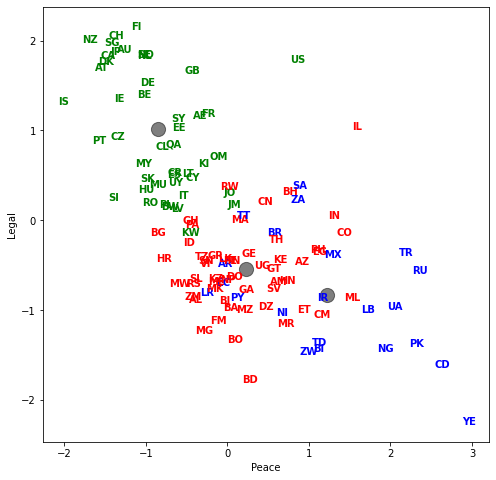

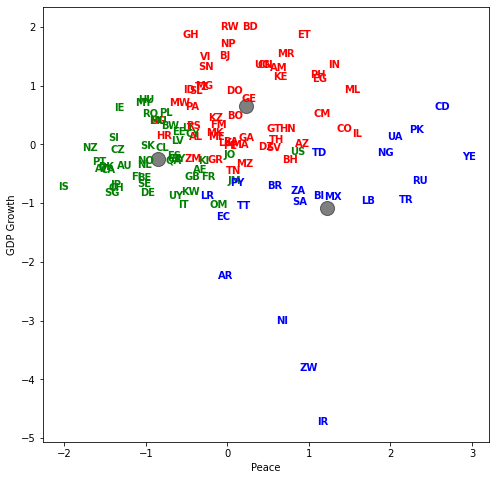

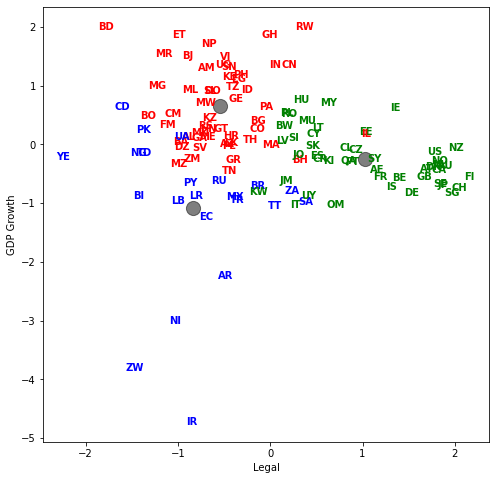

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], country_risk['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

# List results in a DataFrame

In [22]:
result = pd.DataFrame({'Country':country_risk['Country'], 'Abbrev':country_risk['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR